## **Predict PM2.5 Concentration of Hanoi using Random forest**

In this project, i will be analysing and predicting the pm2.5 concentration of Hanoi.

For this project, dataset is taken from IQAir historical data, from 2020-02-25 to 2021-08-31.

# Exploratory data analysis

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
file_path = "BVMT_1.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Data')

In [13]:
df.head(5)

,Datetime,NHIệT độ,NOX,SO2,O3,PM-10,PM-2-5,NO,NO2,CO,ÁP SUấT KHí QUYểN,RADIATION,RH,HướNG GIó,TốC độ GIó,LượNG MưA
0,21:00 25/02/2020,22.2,48.80,6.43,7.08,76.14,50.19,10.25,33.14,998.1,1013.4,7.4,69.1,150,2.4,0
1,22:00 25/02/2020,21.5,63.05,6.25,4.16,75.28,47.97,16.26,38.20,791.8,1013.6,6.9,72.7,151,1.7,0
2,23:00 25/02/2020,21.3,62.61,5.55,3.36,72.97,51.11,16.93,36.75,894,1013.5,6.4,71.6,148,1.9,0
3,00:00 26/02/2020,21.2,61.86,6.68,4.76,77.43,53.45,16.80,36.18,1117.9,1013.4,6.7,70.4,149,2,0
4,01:00 26/02/2020,21,84.88,5.39,1.54,69.16,52.04,27.21,43.30,652.8,1013.2,6.6,73.3,149,1.8,0


In [14]:
df.tail(5)

,Datetime,NHIệT độ,NOX,SO2,O3,PM-10,PM-2-5,NO,NO2,CO,ÁP SUấT KHí QUYểN,RADIATION,RH,HướNG GIó,TốC độ GIó,LượNG MưA
12268,19:00 31/08/2021,29.8,30.74,0,0.0,26.06,31.03,6.49,20.82,278.4,1004.6,11.4,62.7,149,2,0
12269,20:00 31/08/2021,28.9,30.59,0,0.0,0,0,6.47,20.71,274.2,1005.4,6.8,66.4,159,1.9,0
12270,21:00 31/08/2021,28,30.28,0,0.0,31.65,26.58,6.49,20.38,505.5,1006.1,6.6,69.7,154,1.8,0
12271,22:00 31/08/2021,27.5,31.82,0,0.0,33.43,23.98,6.43,22.01,279.5,1006.7,6.6,72.9,177,1.2,0
12272,23:00 31/08/2021,27.3,35.51,0,0.0,34.33,22.99,6.55,25.50,274.5,1006.9,6.5,74,194,1.1,0


In [15]:
df.shape

(12273, 16)

In [18]:
# Rename columns for easier processing
df.columns = [
    "Datetime", "Temperature", "NOX", "SO2", "O3", "PM10", "PM2.5", "NO", "NO2", "CO",
    "Pressure", "Radiation", "RH", "Wind_Direction", "Wind_Speed", "Rainfall"
]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12273 entries, 0 to 12272
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        12273 non-null  object 
 1   Temperature     12273 non-null  object 
 2   NOX             12273 non-null  float64
 3   SO2             12273 non-null  object 
 4   O3              12273 non-null  float64
 5   PM10            12273 non-null  object 
 6   PM2.5           12273 non-null  object 
 7   NO              12273 non-null  float64
 8   NO2             12273 non-null  float64
 9   CO              12273 non-null  object 
 10  Pressure        12273 non-null  object 
 11  Radiation       12273 non-null  object 
 12  RH              12273 non-null  object 
 13  Wind_Direction  12273 non-null  object 
 14  Wind_Speed      12273 non-null  object 
 15  Rainfall        12273 non-null  object 
dtypes: float64(4), object(12)
memory usage: 1.5+ MB


In [21]:
df["Datetime"] = pd.to_datetime(df["Datetime"], format="%H:%M %d/%m/%Y", errors='coerce')
numeric_cols = ["Temperature", "SO2", "PM10", "PM2.5", "CO", "Pressure", "Radiation", "RH", "Wind_Direction", "Wind_Speed", "Rainfall"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12273 entries, 0 to 12272
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Datetime        12273 non-null  datetime64[ns]
 1   Temperature     12268 non-null  float64       
 2   NOX             12273 non-null  float64       
 3   SO2             12271 non-null  float64       
 4   O3              12273 non-null  float64       
 5   PM10            12266 non-null  float64       
 6   PM2.5           12260 non-null  float64       
 7   NO              12273 non-null  float64       
 8   NO2             12273 non-null  float64       
 9   CO              12271 non-null  float64       
 10  Pressure        10931 non-null  float64       
 11  Radiation       10931 non-null  float64       
 12  RH              10931 non-null  float64       
 13  Wind_Direction  10931 non-null  float64       
 14  Wind_Speed      10931 non-null  float64       
 15  Ra

In [44]:
print(df.Datetime.min(), df.Datetime.max())

2020-02-25 21:00:00 2021-08-31 23:00:00


In [30]:
df.isnull().sum()

Datetime             0
Temperature          5
NOX                  0
SO2                  2
O3                   0
PM10                 7
PM2.5               13
NO                   0
NO2                  0
CO                   2
Pressure          1342
Radiation         1342
RH                1342
Wind_Direction    1342
Wind_Speed        1342
Rainfall          1342
dtype: int64

In [36]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [37]:
df.describe()

,Datetime,Temperature,NOX,SO2,O3,PM10,PM2.5,NO,NO2,CO,Pressure,Radiation,RH,Wind_Direction,Wind_Speed,Rainfall
count,12273,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.00000,12273.000000,12273.000000,12273.000000,12273.000000
mean,2020-11-29 02:09:13.727694848,22.780416,30.020046,1.776855,9.337116,55.967837,36.559219,6.023482,20.756242,844.918035,966.367046,130.90915,62.669237,142.145971,1.387322,0.099188
min,2020-02-25 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,-2.060000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2020-07-21 01:00:00,19.400000,11.350000,0.780000,0.790000,30.530000,20.000000,0.720000,8.670000,412.900000,1001.900000,7.10000,56.000000,84.000000,1.000000,0.000000
50%,2020-11-28 20:00:00,24.900000,23.510000,2.040000,4.090000,48.810000,31.740000,2.310000,16.350000,726.300000,1006.500000,9.70000,66.400000,144.000000,1.300000,0.000000
75%,2021-04-09 20:00:00,29.200000,41.030000,2.660000,13.840000,72.880000,47.670000,6.860000,29.470000,1131.700000,1012.200000,157.10000,74.500000,160.000000,1.800000,0.000000
max,2021-08-31 23:00:00,40.600000,683.780000,32.300000,231.190000,393.560000,529.550000,378.600000,246.250000,9946.100000,1028.600000,1030.70000,93.700000,360.000000,5.600000,42.720000
std,NaN,9.605711,28.566460,1.248153,12.805336,42.785551,28.448409,10.919955,18.084249,681.017648,198.997827,220.80929,17.650354,87.858677,0.689925,1.060322


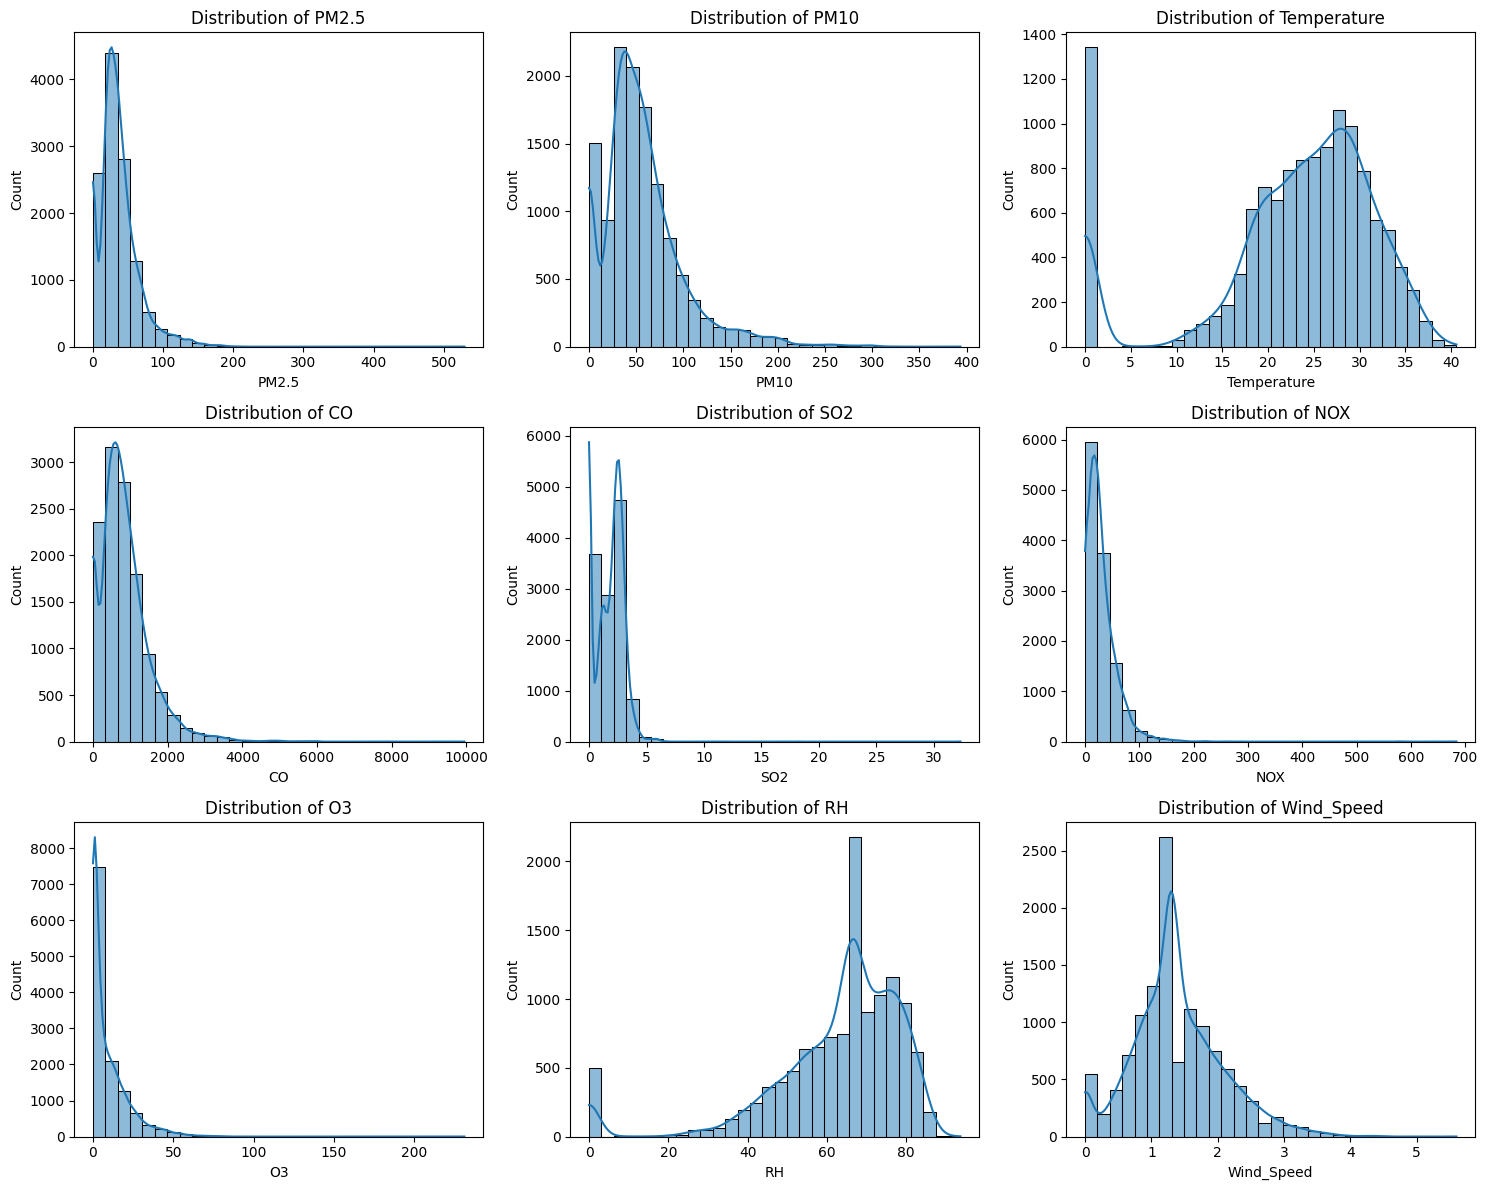

In [38]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
columns_to_plot = ["PM2.5", "PM10", "Temperature", "CO", "SO2", "NOX", "O3", "RH", "Wind_Speed"]

for ax, col in zip(axes.flat, columns_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

PM2.5 and PM10 show right-skewed distributions with some extreme values (potential outliers).

CO has a wide range, suggesting possible anomalies.

Other features, such as Temperature and NOX, show normal or slightly skewed distributions.

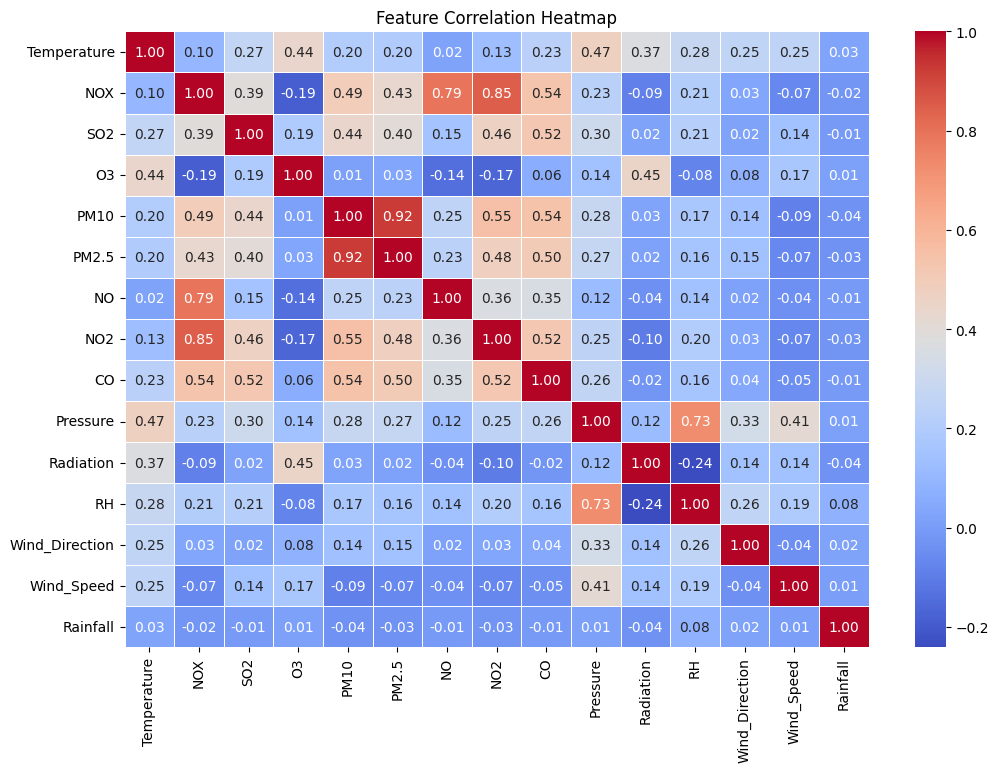

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

PM2.5 is positively correlated with PM10, NOX, NO2, and CO, indicating shared pollution sources.

Temperature has a negative correlation with RH (relative humidity), which is expected.

Wind Speed has a weak relationship with PM2.5, meaning wind might not be a major dispersal factor in this dataset.

# Random forest model

In [ ]:
X = df.drop(columns=["Datetime", "PM2.5"])  
y = df["PM2.5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

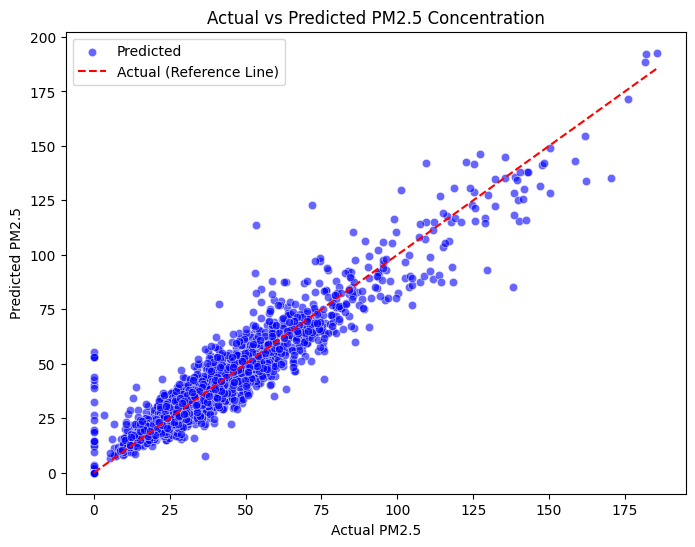

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label="Predicted", color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Actual (Reference Line)")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5 Concentration")
plt.legend()

plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train_scaled, y_train)

best_rf_model = rf_random.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

y_pred = best_rf_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 5.000660485336511
RMSE: 7.782014824499391
R² Score: 0.9177807241326249


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


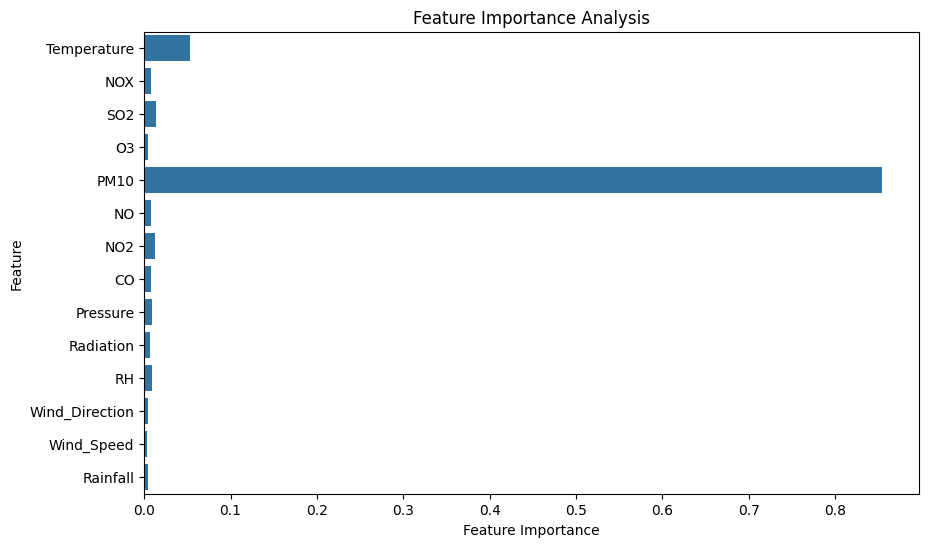

In [48]:
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()